In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
sys.path.append('/nethome/shickson3/CreateNormals/')
from python.calc_normals import NormalCalculation

import math
import random
from skimage.transform import rotate
from skimage.util import random_noise

In [24]:
camera_params = [238.44,0,313.04,0,582.69,242.74,0,0,1]
normal_params = [5,0.02,30,0.04]
flat_labels = [4,11,17,19,21,26,28,36,45,59,64,122,158]
normal_calculator = NormalCalculation(camera_params, normal_params, flat_labels)
label_nyu_mapping = [40,40,3,22,5,40,12,38,40,40,2,39,40,40,26,40,24,40,7,40,1,40,40,34
                    ,38,29,40,8,40,40,40,40,38,40,40,14,40,38,40,40,40,15,39,40,30,40,40,39
                    ,40,39,38,40,38,40,37,40,38,38,9,40,40,38,40,11,38,40,40,40,40,40,40,40
                    ,40,40,40,40,40,40,38,13,40,40,6,40,23,40,39,10,16,40,40,40,40,38,40,40
                    ,40,40,40,40,40,40,40,38,40,39,40,40,40,40,39,38,40,40,40,40,40,40,18,40
                    ,40,19,28,33,40,40,40,40,40,40,40,40,40,38,27,36,40,40,40,40,21,40,20,35
                    ,40,40,40,40,40,40,40,40,38,40,40,40,4,32,40,40,39,40,39,40,40,40,40,40
                    ,17,40,40,25,40,39,40,40,40,40,40,40,40,40,39,40,40,40,40,40,40,40,40,40
                    ,40,40,40,40,40,40,40,40,40,40,40,39,40,40,40,40,40,40,40,40,40,39,38,38
                    ,40,40,39,40,39,40,38,39,38,40,40,40,40,40,40,40,40,40,40,39,40,38,40,40
                    ,38,38,40,40,40,40,40,40,40,40,40,40,40,40,40,38,40,40,40,40,40,39,40,40
                    ,40,40,40,40,40,40,40,40,40,40,40,40,40,39,40,40,40,40,40,40,40,40,40,40
                    ,40,40,39,40,40,40,38,40,40,39,40,40,38,40,40,40,40,40,40,40,40,40,40,40
                    ,39,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,31,40,40,40,40,40
                    ,40,40,38,40,40,38,39,39,40,40,40,40,40,40,40,40,40,38,40,39,40,40,39,40
                    ,40,40,38,40,40,40,40,40,40,40,40,38,39,40,40,40,40,40,40,38,40,40,40,40
                    ,40,40,40,40,40,40,40,38,39,40,40,40,40,40,40,40,39,40,40,40,40,40,40,38
                    ,40,40,40,38,40,39,40,40,40,39,39,40,40,40,40,40,40,40,40,40,40,39,40,40
                    ,40,40,40,40,40,40,40,40,40,40,39,39,40,40,39,39,40,40,40,40,38,40,40,38
                    ,39,39,40,39,40,39,38,40,40,40,40,40,40,40,40,40,40,40,39,40,38,40,39,40
                    ,40,40,40,40,39,39,40,40,40,40,40,40,39,39,40,40,38,39,39,40,40,40,40,40
                    ,40,40,40,40,39,39,40,40,40,40,39,40,40,40,40,40,39,40,40,39,40,40,40,40
                    ,40,40,40,40,40,40,40,40,40,40,40,39,38,40,40,40,40,40,40,40,39,38,39,40
                    ,38,39,40,39,40,39,40,40,40,40,40,40,40,40,38,40,40,40,40,40,38,40,40,39
                    ,40,40,40,39,40,38,40,40,40,40,40,40,40,40,38,40,40,40,40,40,40,40,40,40
                    ,40,40,40,40,40,40,40,39,38,40,40,38,40,40,38,40,40,40,40,40,40,40,40,40
                    ,39,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,38,40,40,38,40,40,40
                    ,40,40,40,40,40,40,40,40,38,38,38,40,40,40,38,40,40,40,38,38,40,40,40,40
                    ,40,40,40,40,40,40,40,40,40,40,40,40,40,38,40,40,40,40,40,40,40,40,40,40
                    ,40,40,40,38,40,38,39,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
                    ,40,40,40,40,40,40,40,40,40,40,40,40,40,39,40,40,40,40,40,40,40,40,40,40
                    ,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
                    ,40,39,40,39,40,40,40,40,38,38,40,40,40,38,40,40,40,40,40,40,40,40,40,40
                    ,40,40,40,40,39,40,40,39,40,40,39,39,40,40,40,40,40,40,40,40,39,39,39,40
                    ,40,40,40,39,40,40,40,40,40,40,40,40,39,40,40,40,40,40,39,40,40,40,40,40
                    ,40,40,40,40,40,40,40,40,40,38,40,40,40,40,40,40,40,39,40,40,38,40,39,40
                    ,40,40,40,38,40,40,40,40,40,38,40,40,40,40,40,40,40,39,40,40,40,40,40,40
                    ,40,40,40,39,40,40]
#label_nyu_mapping[:] = [x - 1 for x in label_nyu_mapping] 
label_nyu_mapping.insert(0,0)

def MapLabels(label):
    label_nyu = np.array([label_nyu_mapping[x] for x in label.flatten()])
    return label_nyu.reshape(label.shape).astype(np.uint16)

In [25]:
image_files = []
depth_files = []
label_files = []
with open('nyu_test.txt') as fp:
    for line in fp:
        splits = line.strip('\n').split(',')
        image_files.append(splits[0])
        depth_files.append(splits[1])
        label_files.append(splits[2])

In [26]:
num = 0

In [64]:
def rotate_images(image, depth, normals, label, max_rotation):
    random_degree = random.uniform(-max_rotation, max_rotation)
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D((cX, cY), random_degree, 1.0)
    new_image = cv2.warpAffine(image, M, (w, h))
    new_depth = cv2.warpAffine(depth, M, (w, h), flags=cv2.INTER_NEAREST)
    new_label = cv2.warpAffine(label, M, (w, h), flags=cv2.INTER_NEAREST)
    rot_normals = cv2.warpAffine(normals, M, (w, h), flags=cv2.INTER_NEAREST)
    # Recalculate normals
    random_rads = math.radians(random_degree)
    cos_val = math.cos(random_rads)
    sin_val = math.sin(random_rads)
    new_normals = np.copy(rot_normals)
    new_normals[:,:,0] = rot_normals[:,:,0] * cos_val - rot_normals[:,:,1] * sin_val
    new_normals[:,:,1] = rot_normals[:,:,0] * sin_val + rot_normals[:,:,1] * cos_val
    return (new_image, new_depth, new_normals, new_label)
    
def flip_images(image, depth, normals, label, probability):
    op_prob = random.uniform(0,1)
    if op_prob <= probability:
        new_image = image[:, ::-1]
        new_depth = depth[:, ::-1]
        new_normals = normals[:, ::-1]
        new_label = label[:, ::-1]
        # Recalculate normals
        new_normals[:,:,0] *= -1
        return (new_image, new_depth, new_normals, new_label)
    return (image, depth, normals, label)
    
def blur_images(image, depth, normals, label, max_kernel):
    random_kernel = int(np.floor(random.uniform(1, max_kernel)) // 2 * 2 + 1)
    new_image = cv2.GaussianBlur(image,(random_kernel,random_kernel),cv2.BORDER_DEFAULT)
    return (new_image, depth, normals, label)
    
def random_noise_images(image, depth, normals, label, max_variance):
    op_prob = random.uniform(0,max_variance)
    #if op_prob <= probability:
    new_image = (random_noise(image, var=op_prob) * 255).astype(np.uint8)
    #else:
    #    new_image = image
    return (new_image, depth, normals, label)

def crop_images(image, depth, normals, label, max_crop_percent):
    output_shape = depth.shape[::-1]
    crop_width_start = int(np.floor(random.uniform(0, max_crop_percent) * output_shape[0]))
    crop_width = output_shape[0] - int(np.floor(random.uniform(0, max_crop_percent) * output_shape[0]))
    crop_height_start = int(np.floor(random.uniform(0, max_crop_percent) * output_shape[1]))
    crop_height = output_shape[1] - int(np.floor(random.uniform(0, max_crop_percent) * output_shape[1]))
    new_image = cv2.resize(image[crop_height_start:crop_height, crop_width_start:crop_width], output_shape)
    new_depth = cv2.resize(depth[crop_height_start:crop_height, crop_width_start:crop_width], output_shape, interpolation=cv2.INTER_NEAREST).astype(np.float32)
    new_normals = cv2.resize(normals[crop_height_start:crop_height, crop_width_start:crop_width], output_shape, interpolation=cv2.INTER_NEAREST)
    new_label = cv2.resize(label[crop_height_start:crop_height, crop_width_start:crop_width], output_shape, interpolation=cv2.INTER_NEAREST)
    scale = min(float(crop_width - crop_width_start) / output_shape[0], float(crop_height - crop_height_start) / output_shape[1])
    new_depth *= scale
    return (new_image, new_depth.astype(np.uint16), new_normals, new_label)

def augment_images(image, depth, normals, label, config):
    if 'aug_max_rotation' in config:
        image, depth, normals, label = rotate_images(image, depth, normals, label, config['aug_max_rotation'])
    if 'aug_flip_prob' in config:
        image, depth, normals, label = flip_images(image, depth, normals, label, config['aug_flip_prob'])
    if 'aug_blur_max' in config:
        image, depth, normals, label = blur_images(image, depth, normals, label, config['aug_blur_max'])
    if 'aug_max_noise_var' in config:
        image, depth, normals, label = random_noise_images(image, depth, normals, label, config['aug_max_noise_var'])
    if 'aug_max_crop_percent' in config:
        image, depth, normals, label = crop_images(image, depth, normals, label, config['aug_max_crop_percent'])
    return (image, depth, normals, label)


In [65]:
img = cv2.imread(image_files[num], cv2.IMREAD_COLOR)
depth = cv2.imread(depth_files[num], cv2.IMREAD_ANYDEPTH)
label = cv2.imread(label_files[num], cv2.IMREAD_ANYDEPTH)
resized_labels = cv2.resize(label, depth.shape[::-1], interpolation=cv2.INTER_NEAREST)
normals = normal_calculator.Calculate(depth, resized_labels)
config = {'aug_max_rotation': 5, 'aug_flip_prob': 0.5, 'aug_blur_max': 9, 'aug_max_noise_var': 0.002, 'aug_max_crop_percent': 0.1}
label = MapLabels(label)
img, depth, normals, label = augment_images(img, depth, normals, label, config)

In [66]:
nq_direc = depth_files[num].replace('raw_depth', 'normals_quant')
fields = nq_direc.split('/')
file_num_fields = fields[-1].split('.')
fields[-1] = file_num_fields[0].zfill(4) + '.' + file_num_fields[1]
nq_direc = '/'.join(fields)
print(nq_direc)
normals_quant = cv2.imread(nq_direc, cv2.IMREAD_COLOR)

sp_direc = depth_files[num].replace('raw_depth', 'seg_parsed')
fields = sp_direc.split('/')
file_num_fields = fields[-1].split('.')
fields[-1] = file_num_fields[0].zfill(4) + '.' + file_num_fields[1]
sp_direc = '/'.join(fields)
print(sp_direc)
labels_parsed = cv2.imread(sp_direc, cv2.IMREAD_ANYDEPTH)

/srv/datasets/nyudv2/normals_quant/1001.png
/srv/datasets/nyudv2/seg_parsed/1001.png


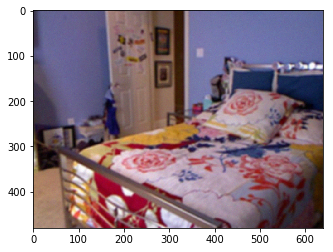

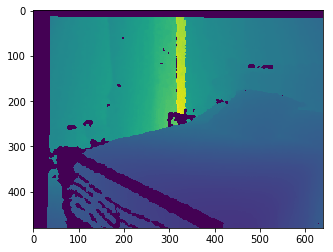

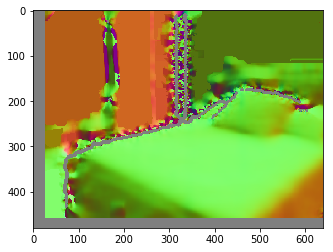

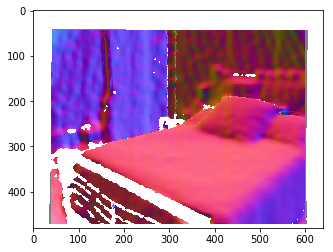

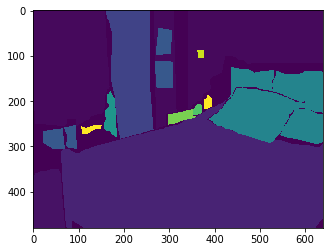

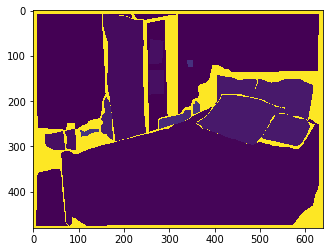

uint8
uint16
float32
uint8
uint16
uint8


In [67]:
plt.imshow(img)
plt.show()
plt.imshow(depth)
plt.show()
plt.imshow((normals + 1.0) / 2.0)
plt.show()
plt.imshow(normals_quant)
plt.show()
plt.imshow(label)
plt.show()
plt.imshow(labels_parsed)
plt.show()
print img.dtype
print depth.dtype
print normals.dtype
print normals_quant.dtype
print label.dtype
print labels_parsed.dtype

In [68]:
print np.unique(label)
print np.unique(labels_parsed)

[ 0  1  2  4  8 11 18 21 29 32 37 40]
[  0   1   3   7  10  17  20  28  31  36  39 255]
